In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=900da3fdc0cd4ea37fb6101252bbf6bc


In [9]:
city_url = url + "&q=" + city.replace(" ","+")
#city_url
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 114.16, 'lat': 22.29},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 69.84,
  'feels_like': 72.88,
  'temp_min': 60.01,
  'temp_max': 73.99,
  'pressure': 1017,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 51, 'gust': 7},
 'rain': {'1h': 0.2},
 'clouds': {'all': 1},
 'dt': 1604158729,
 'sys': {'type': 3,
  'id': 2035800,
  'country': 'HK',
  'sunrise': 1604096814,
  'sunset': 1604137613},
 'timezone': 28800,
 'id': 1819729,
 'name': 'Hong Kong',
 'cod': 200}

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | kayerkan
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | san carlos del zulia
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | karaul
City not found. Skipping...
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | cayenne
Processing Record 18 of Set 1 | grindavik
Processing Record 19 of Set 1 | cam ranh
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | kolondieba
Processing Record 22 of Set 1 | hithadhoo
Processing Record

Processing Record 42 of Set 4 | sergeyevka
Processing Record 43 of Set 4 | yeppoon
Processing Record 44 of Set 4 | praia
Processing Record 45 of Set 4 | shaartuz
City not found. Skipping...
Processing Record 46 of Set 4 | port shepstone
Processing Record 47 of Set 4 | paracuru
Processing Record 48 of Set 4 | kulhudhuffushi
Processing Record 49 of Set 4 | pleasanton
Processing Record 50 of Set 4 | gorom-gorom
Processing Record 1 of Set 5 | kyra
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | moree
Processing Record 6 of Set 5 | dingle
Processing Record 7 of Set 5 | hit
Processing Record 8 of Set 5 | humaita
Processing Record 9 of Set 5 | tungkang
City not found. Skipping...
Processing Record 10 of Set 5 | ridgecrest
Processing Record 11 of Set 5 | aasiaat
Processing Record 12 of Set 5 | sao geraldo do araguaia
Processing Record 13 of Set 5 | paradwip
City not f

Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | amapa
Processing Record 30 of Set 8 | naron
Processing Record 31 of Set 8 | chuy
Processing Record 32 of Set 8 | mitsamiouli
Processing Record 33 of Set 8 | fort nelson
Processing Record 34 of Set 8 | zhangye
Processing Record 35 of Set 8 | bonavista
Processing Record 36 of Set 8 | vila do maio
Processing Record 37 of Set 8 | pimentel
Processing Record 38 of Set 8 | stornoway
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | kropotkin
Processing Record 41 of Set 8 | lovington
Processing Record 42 of Set 8 | tombouctou
Processing Record 43 of Set 8 | santa maria
Processing Record 44 of Set 8 | rayadrug
Processing Record 45 of Set 8 | porto velho
Processing Record 46 of Set 8 | touros
Processing Record 47 of Set 8 | puerto leguizamo
Processing Record 48 of Set 8 | wajir
Processing Record 49 of Set 8 | bath
Processing Record 50 of Set 8 | laguna
Processing Record 1 of Set 9 | leningradskiy
Processi

Processing Record 13 of Set 12 | salacgriva
Processing Record 14 of Set 12 | meulaboh
Processing Record 15 of Set 12 | xining
Processing Record 16 of Set 12 | farkhor
Processing Record 17 of Set 12 | shache
Processing Record 18 of Set 12 | orumiyeh
Processing Record 19 of Set 12 | shingu
Processing Record 20 of Set 12 | waterloo
Processing Record 21 of Set 12 | smithers
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | fuling
Processing Record 24 of Set 12 | channel-port aux basques
Processing Record 25 of Set 12 | verkh-chebula
Processing Record 26 of Set 12 | mamallapuram
Processing Record 27 of Set 12 | kahului
Processing Record 28 of Set 12 | orizona
Processing Record 29 of Set 12 | petit goave
Processing Record 30 of Set 12 | pemberton
Processing Record 31 of Set 12 | meadow lake
Processing Record 32 of Set 12 | carlsbad
Processing Record 33 of Set 12 | spornoye
Processing Record 34 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 35 

In [11]:
len(city_data)

556

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,55.40,54,40,3.36,AR,2020-10-31 15:35:09
1,Rikitea,-23.12,-134.97,74.86,71,8,7.61,PF,2020-10-31 15:39:12
2,Saint-Philippe,-21.36,55.77,71.60,56,90,5.82,RE,2020-10-31 15:39:12
3,Tasiilaq,65.61,-37.64,32.00,95,90,2.24,GL,2020-10-31 15:39:12
4,Mataura,-46.19,168.86,44.01,86,5,3.00,NZ,2020-10-31 15:39:12
5,Clyde River,70.47,-68.59,15.80,92,90,12.75,CA,2020-10-31 15:33:09
6,Talnakh,69.49,88.40,17.60,92,75,40.26,RU,2020-10-31 15:37:18
7,Kayerkan,69.35,87.76,17.60,92,75,40.26,RU,2020-10-31 15:39:12
8,Hermanus,-34.42,19.23,66.99,57,0,10.00,ZA,2020-10-31 15:39:12
9,Punta Arenas,-53.15,-70.92,51.80,71,0,9.17,CL,2020-10-31 15:39:12


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-10-31 15:35:09,-54.80,-68.30,55.40,54,40,3.36
1,Rikitea,PF,2020-10-31 15:39:12,-23.12,-134.97,74.86,71,8,7.61
2,Saint-Philippe,RE,2020-10-31 15:39:12,-21.36,55.77,71.60,56,90,5.82
3,Tasiilaq,GL,2020-10-31 15:39:12,65.61,-37.64,32.00,95,90,2.24
4,Mataura,NZ,2020-10-31 15:39:12,-46.19,168.86,44.01,86,5,3.00
...,...,...,...,...,...,...,...,...,...
551,Severo-Kurilsk,RU,2020-10-31 15:39:54,50.68,156.12,41.70,79,100,26.82
552,Lakes Entrance,AU,2020-10-31 15:39:54,-37.88,147.98,55.99,89,38,4.00
553,Mineiros,BR,2020-10-31 15:39:54,-17.57,-52.55,83.44,57,56,4.00
554,Itaituba,BR,2020-10-31 15:39:54,-4.28,-55.98,86.00,74,40,4.59


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time

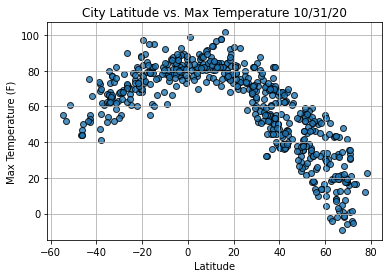

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

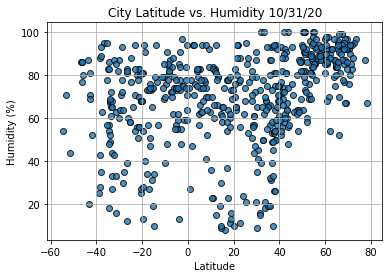

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

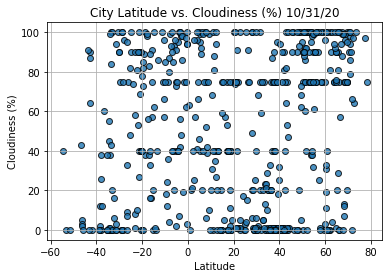

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

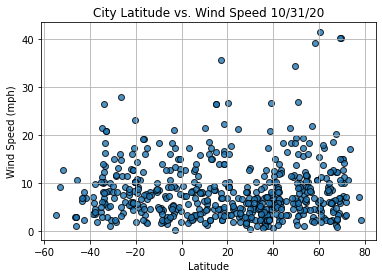

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()